# Domain : Buisness Analytics Intern

Golden Task

Pricing Strategy Determination

# Problem Statement

2.Pricing Strategy Determination
  
    The objective of this project is to determine the price of a newly releasing product by researching
market dynamics, analyze cost structures, and develop pricing models that align with business
goals, customer expectations, and market conditions. The main motto behind this project is to
optimize pricing strategies to achieve a balance between revenue generation, customer
satisfaction, and long-term sustainability and sustain profitability in the marketplace.(Use Tata’s
Dataset)

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Train on 1975 samples
Epoch 1/100
1975/1975 [==============================] - 26s 13ms/sample - loss: 0.0087
Epoch 2/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 0.0028
Epoch 3/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 0.0027
Epoch 4/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0026
Epoch 5/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 0.0023
Epoch 7/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0023
Epoch 8/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0020
Epoch 9/100
1975/1975 [==============================] - 11s 6ms/sample - loss: 0.0019
Epoch 10/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 0.0019
Epoch 11/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 0.0017
Epoch 12/100
1975/

1975/1975 [==============================] - 12s 6ms/sample - loss: 6.1498e-04
Epoch 92/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 5.9885e-04
Epoch 93/100
1975/1975 [==============================] - 14s 7ms/sample - loss: 6.9376e-04
Epoch 94/100
1975/1975 [==============================] - 13s 6ms/sample - loss: 7.1854e-04
Epoch 95/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 6.5833e-04
Epoch 96/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 7.2933e-041s - loss: 
Epoch 97/100
1975/1975 [==============================] - 15s 8ms/sample - loss: 6.6833e-041s - loss: 6.9
Epoch 98/100
1975/1975 [==============================] - 12s 6ms/sample - loss: 7.3510e-04
Epoch 99/100
1975/1975 [==============================] - 17s 9ms/sample - loss: 6.3652e-04
Epoch 100/100
1975/1975 [==============================] - 15s 7ms/sample - loss: 5.2290e-04


In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


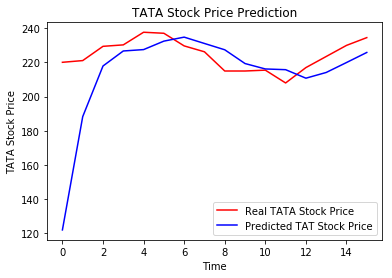

In [19]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()